In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show(y: list[float], x: list[float], title: str="", xlabel: str="x", ylabel: str="y(x)"):
    plt.figure(dpi=150)
    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(y, x, color="blue")

    plt.grid()
    plt.minorticks_on()
    plt.grid(which="minor")

    plt.tight_layout()
    plt.show()

## Задача XI.9.5
Для численного отыскания периодического с периодом единица решения уравнения
$$ y^{''} - P^2(x)y = f(x), $$
где $ P^2(x) \lt 0 $ и $ f(x) $ - заданные периодические функции, используется разностная схема

$$
\begin{cases}
    \frac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 = f(0) \\

    \frac{y_{n+1} - 2y_{n} + y_{n-1}}{h^2} - P^2(nh)y_{n} = f(nh) \text{, } n = 1,2,\dots,N-2 \\

    \frac{y_0 - 2y_{N - 1} + y_{N - 2}}{h^2} - P^2(1 - h)y_{N - 1} = f(1 - h),
\end{cases}
$$

где $ Nh = 1 $.

Вычислить решение при $ h = 0.005 $ в случае $ P^2(x) = 10 + sin(2\pi x), f(x) = cos(2\pi x). $

Для численного отыскания периодического с периодом единица решения уравнения

$$ y^{''} + p(x)y^{'} + q(x)y = f(x), $$

где f, q, p - заданные функции, используется разностная схема второго порядка аппроксимации с центральной разностью

$$ \frac{y_{n+1} - 2y_{n} + y_{n-1}}{h^2} + p_{n}\frac{y_{n+1} + y_{n-1}}{h^2} + q_{n}y_{n} = f_{n}.$$

### Коэффициенты

$$ a_{0}y_{N} - b_{0}y_{0} + c_{0}y_{1} = \varphi_{0}, $$
$$ \dots $$
$$ a_{n}y_{n-1} - b_{n}y_{n} + c_{n}y_{n+1} = \varphi_{n}, $$
$$ \dots $$
$$ a_{N}y_{N-1} - b_{N}y_{N} + c_{N}y_{0} = \varphi_{N}, $$

где $ a_{k} = 1 - 0.5p_{k}h, \quad b_{k} = 2 - q_{k}h^2, \quad c_{k} = 1 + 0.5p_{k}h, \quad \varphi_{k} = f_{k}h^2. $

$ y_{n-1} = \alpha_{n}y_{n} + \beta_{n} + \gamma_{n}y_{N}$

Из приведенного выше соотношения для $ y_0 $ сразу получаем, что $ \alpha_{1} = c_0/b_0, \quad \beta_{1} = -\varphi_{0}/b_{0}, \quad \gamma_{1} = a_0/b_0.  $

Теперь несложно получить рекуррентную зависимость для прогоночных коэффициентов:

$$ \alpha_{k+1} = \frac{c_k}{b_k - \alpha_{k}a_k} \quad \beta_{k+1} = \frac{a_k \beta_{k} - \varphi_{k}}{b_k - \alpha_{k}a_k}, \quad \gamma_{k+1} = \frac{a_k \gamma_{k}}{b_k - \alpha_{k}a_k}. $$

$$\mu_{N} = \frac{-c_{N}}{a_{N}(\alpha_{N} + \gamma_{N}) - b_{N}}, \quad \nu_{N} = \frac{\varphi_{N} - a_{N}\beta_{N}}{a_{N}(\alpha_{N} + \gamma_{N}) - b_{N}} $$

Теперь выражение для значения сеточной функции $ y_{n-1} $ подставляем в прогоночные соотношения. Получается выражение, связывающее $ y_{n-1} $ c $ y_0 $:

$$ y_{n-1} = \alpha_{n}(\mu_{n}y_{0} + \nu_{n}) + \beta_{n} + \gamma_{n}(\mu_{N}y_{0} + \nu_{N}). $$

Отсюда получаем следующие рекуррентные соотношения:

$$ \mu_{n-1} = \alpha_{n}\mu_{n} + \gamma_{n}\mu_{N}, \quad \nu_{n-1} = \beta_{n} + \alpha_{n}\nu_{n} + \gamma_{n}\nu_{N}. $$

In [22]:
h = 5e-3
N = int(1 / h)

x = np.linspace(0, 1, N)

p = np.array([0 for _ in x])
q = -np.array([10 + np.sin(2 * np.pi * i) for i in x])
f = np.array([np.cos(2 * np.pi * i) for i in x])

a = 1 - 0.5 * p * h
b = 2 - q * h**2
c = 1 + 0.5 * p * h
phi = f * h**2

alpha = np.zeros(N)
beta  = np.zeros(N)
gamma = np.zeros(N)

alpha[1] = c[0] / b[0]
beta[1] = -phi[0] / b[0]
gamma[1] = a[0] / b[0]

for k in range(1, N - 1):
    alpha[k + 1] = c[k] / (b[k] - alpha[k] * a[k])
    beta[k + 1] = (a[k] * beta[k] - phi[k]) / (b[k] - alpha[k] / a[k])
    gamma[k + 1] = a[k] * gamma[k] / (b[k] - alpha[k] * a[k])


mu = np.zeros(N)
nu = np.zeros(N)

mu[N - 1] = -c[N - 1] / (a[N - 1] * (alpha[N - 1] + gamma[N - 1]) - b[N - 1])
nu[N - 1] = (phi[N - 1] - a[N - 1] * beta[N - 1]) / (a[N - 1] * (alpha[N - 1] + gamma[N - 1]) - b[N - 1])

for n in range(N - 1, 0, -1):
    mu[n - 1] = alpha[n] * mu[n] + gamma[n] * mu[N - 1]
    nu[n - 1] = beta[n] + alpha[n] * nu[n] + gamma[n] * nu[N - 1]


y = np.zeros(N)

y[0] = nu[0] / (1 - mu[0])
y[N - 1] = mu[N - 1] * y[0] + nu[N - 1]

for n in range(N - 1, 0, -1):
    y[n - 1] = alpha[n] * y[n] + beta[n] + gamma[n] * y[N - 1]

y = np.tile(y, 5)
x = np.linspace(0, 5 * N - 1, 5 * N)

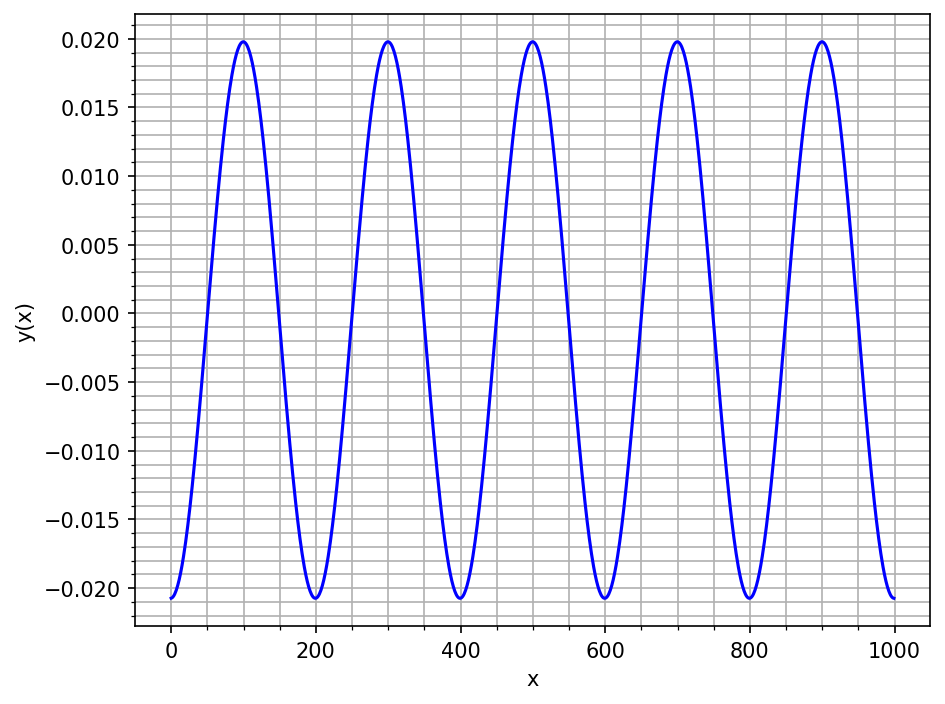

In [23]:
show(x, y, xlabel="x", ylabel="y(x)")